<a href="https://colab.research.google.com/github/Ashirbad23/Legendary_Pokemon_Prediction/blob/main/Legendary_Pokemon_Predicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# All Important Imports

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Read Data
Download Dataset from (https://www.kaggle.com/datasets/jaidalmotra/pokemon-dataset/)

In [27]:
df = pd.read_csv(r"/content/drive/MyDrive/Machine_Learning_Datasets/Pokemon.csv")

In [28]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


# Data Cleaning

In [30]:
df['type2'].fillna("NoSecondType", inplace=True)
df.isnull().sum()

number        0
name          0
type1         0
type2         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64

In [32]:
df["type1"].value_counts()

type1
Water        136
Normal       117
Grass         94
Bug           83
Psychic       80
Fire          67
Electric      63
Rock          60
Dark          48
Fighting      45
Ghost         43
Poison        42
Ground        42
Dragon        41
Steel         39
Ice           38
Fairy         23
Flying         9
Blastoise      1
Graass         1
Name: count, dtype: int64

In [34]:
df["type1"] = df["type1"].replace({"Graass": "Grass"})

# Ploting Number Pokemons of each Type (Primary Type)


In [35]:
type1 = df["type1"].value_counts()
type1

type1
Water        136
Normal       117
Grass         95
Bug           83
Psychic       80
Fire          67
Electric      63
Rock          60
Dark          48
Fighting      45
Ghost         43
Ground        42
Poison        42
Dragon        41
Steel         39
Ice           38
Fairy         23
Flying         9
Blastoise      1
Name: count, dtype: int64

<ipython-input-48-95829cb75284>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(data=df, x='type1', palette='Set2')


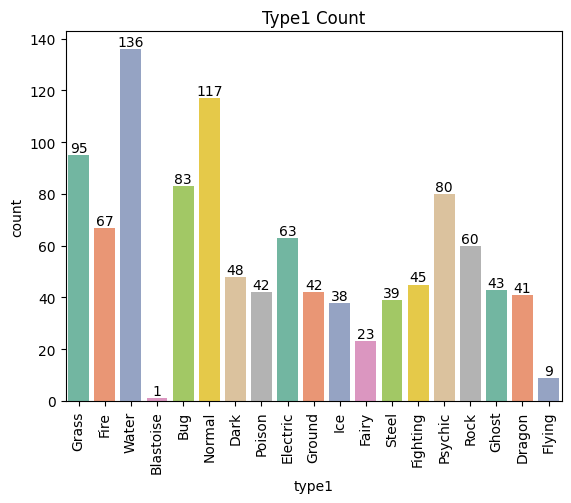

In [48]:
countplot = sns.countplot(data=df, x='type1', palette='Set2')
for count in countplot.containers:
  countplot.bar_label(count,)
plt.xticks(rotation=90)
plt.title("Type1 Count")
plt.show()

# Plotting Number of Pokemons of having secondary types

In [45]:
type2 = df['type2'].value_counts()
type2

type2
NoSecondType    498
Flying          114
Fairy            44
Psychic          43
Poison           41
Ground           39
Steel            36
Dragon           35
Fighting         32
Grass            29
Dark             28
Ghost            26
Water            22
Ice              19
Fire             18
Rock             16
Normal           11
Electric         11
Bug              10
Name: count, dtype: int64

<ipython-input-49-951d3b075e38>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(data=df, x='type2', palette='Set2')


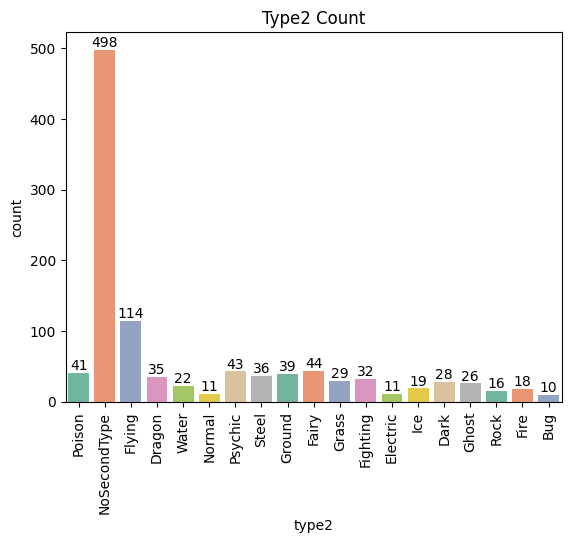

In [49]:
countplot = sns.countplot(data=df, x='type2', palette='Set2')
for count in countplot.containers:
  countplot.bar_label(count,)
plt.xticks(rotation=90)
plt.title("Type2 Count")
plt.show()

# Pokemons of max stats of each parameter
### Hp

In [56]:
df[df.hp==df.hp.max()].name

304                 Blissey
1057    Eternamax Eternatus
Name: name, dtype: object

### Attack


In [55]:
df[df.attack==df.attack.max()].name

204    Mega Mewtwo X
Name: name, dtype: object

### Defense

In [57]:
df[df.defense==df.defense.max()].name

1057    Eternamax Eternatus
Name: name, dtype: object

### Speacial Attack


In [58]:
df[df.sp_attack==df.sp_attack.max()].name

205    Mega Mewtwo Y
Name: name, dtype: object

### Special Defense

In [59]:
df[df.sp_defense==df.sp_defense.max()].name

1057    Eternamax Eternatus
Name: name, dtype: object

### Speed

In [60]:
df[df.speed==df.speed.max()].name

1065    Regieleki
Name: name, dtype: object

# Plotting the Pokemon is Legendary Counts or Non Legendary counts

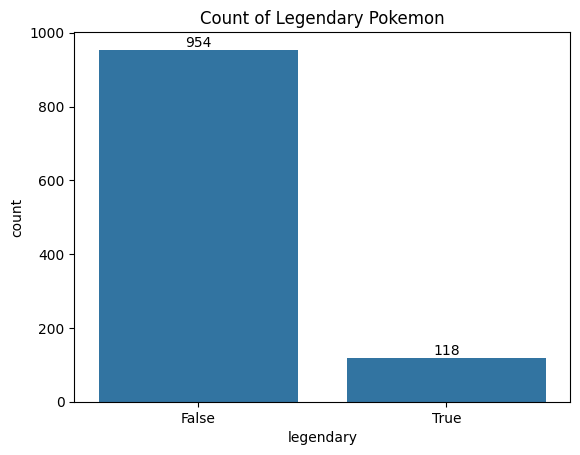

In [63]:
countplot=sns.countplot(data=df,x="legendary")
for count in countplot.containers:
    countplot.bar_label(count,)
plt.title("Count of Legendary Pokemon")
plt.show()

# Plotting the number of pokemons from each Generation

In [61]:
gen = df.generation.value_counts()
gen

generation
1    178
5    166
3    160
8    139
4    121
7    114
2    106
6     85
0      3
Name: count, dtype: int64

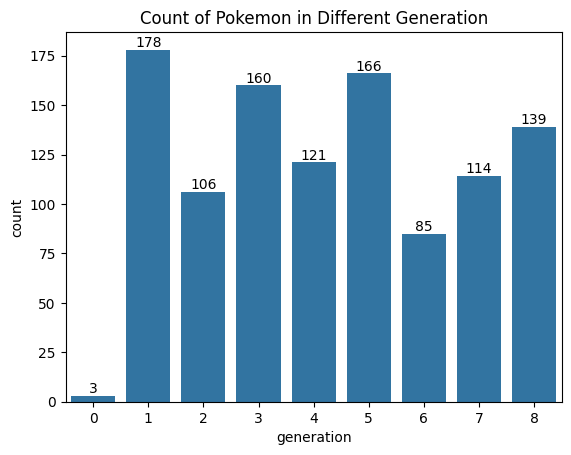

In [64]:
countplot=sns.countplot(data=df,x="generation")
for count in countplot.containers:
    countplot.bar_label(count,)
plt.title("Count of Pokemon in Different Generation")
plt.show()

# Plotting the speed of each type of pokemon

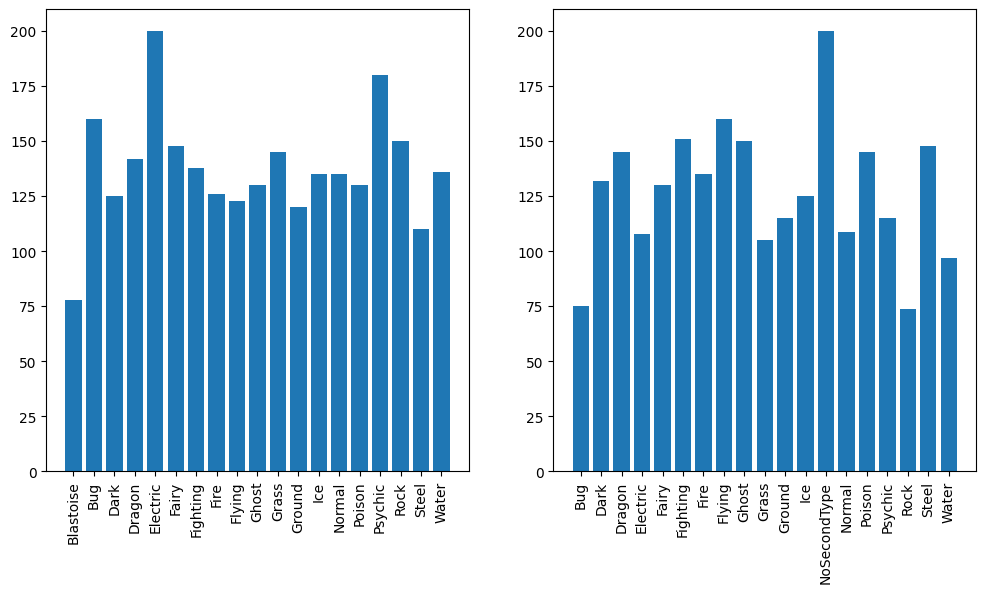

In [65]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

mxsp1=df.groupby("type1")["speed"].max()
a=mxsp1.index
b=mxsp1.values
plt.bar(x=a,height=b)
plt.xticks(rotation=90)


plt.subplot(1,2,2)

mxsp2=df.groupby("type2")["speed"].max()
a=mxsp2.index
b=mxsp2.values
plt.bar(x=a,height=b)
plt.xticks(rotation=90)
plt.show()


In [20]:
df.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


# ML Model Building

## Data Encoding

In [ ]:
LE = preprocessing.LabelEncoder()
for i in df:
  if df[i].dtype == object:
    df[i] = LE.fit_transform(df[i])

df['legendary'] = preprocessing.LabelBinarizer(df['legendary'])

## Train Test Split

In [75]:
X = df[['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
y = df.legendary

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=23)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(857, 7) (215, 7) (857,) (215,)


## Fit into model

In [72]:
model = RandomForestClassifier(max_leaf_nodes=10)
model.fit(train_X, train_y)


RandomForestClassifier(max_leaf_nodes=10)

## Prediction

In [73]:
pred_y = model.predict(test_X)

confusion_matrix(test_y, pred_y)

array([[185,   4],
       [  8,  18]])

In [74]:
accuracy_score(test_y, pred_y)

0.9441860465116279

## Testing


In [78]:
normal = [[490, 75, 110, 105, 30, 70, 100]]
legen = [[590, 90, 120, 80, 68, 108, 124]]

print("Normal Pokemon: ", model.predict(normal))
print("Legendary Pokemon: ", model.predict(legen))

Normal Pokemon:  [False]
Legendary Pokemon:  [ True]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
